# Death Rates for Suicide
- This Dataset and web is going to be about suicides and the correlations between them.
- These are aligned with sex, race, origin, and age in the United States


In [2]:
# This data cell is to initialize the Pandas dataframe and check if the table is inputed correctly
# Also initializes the matplotlib dataframe for visualization

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv')

# Display the first few rows to verify
df.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3,NaN


# Exploratory Data Analysis/Visuals
- Creating graphs for visualization of the data
- Exploring the statistics of the dataset
- Understanding the data as code

In [3]:
# Checking the total rate of the amount of suicide deaths per all persons in the United States
# Checking the 2018 (MOST RECENT) suicide death rate per all persons in the United States
# Checking the suicide death rate trend per all persons in the United States

total_rates = df[(df['STUB_LABEL'] == 'All persons') & (df['UNIT'] == 'Deaths per 100,000 resident population, age-adjusted')]

avg_death_rate = total_rates['ESTIMATE'].mean()

latest_year_rate = total_rates[total_rates['YEAR'] == 2018]['ESTIMATE'].values[0]

# Calculate the trend (change from 1950 to 2018)
initial_rate = total_rates[total_rates['YEAR'] == 1950]['ESTIMATE'].values[0]
final_rate = latest_year_rate
trend = final_rate - initial_rate

# Print results
print(f"Average suicide death rate (age-adjusted): {avg_death_rate:.2f} per 100,000")
print(f"Most recent suicide death rate (2018): {latest_year_rate:.2f} per 100,000")
print(f"Change from 1950 to 2018: {trend:.2f} per 100,000\n")

decades = range(1950, 2020, 10)
for decade in decades:
    decade_rates = total_rates[(total_rates['YEAR'] >= decade) & (total_rates['YEAR'] < decade+10)]
    if not decade_rates.empty:
        avg = decade_rates['ESTIMATE'].mean()
        print(f"{decade}s average: {avg:.2f} per 100,000")

Average suicide death rate (age-adjusted): 12.11 per 100,000
Most recent suicide death rate (2018): 14.20 per 100,000
Change from 1950 to 2018: 1.00 per 100,000

1950s average: 13.20 per 100,000
1960s average: 12.50 per 100,000
1970s average: 13.10 per 100,000
1980s average: 12.51 per 100,000
1990s average: 11.69 per 100,000
2000s average: 11.04 per 100,000
2010s average: 13.07 per 100,000


# Visualizations for the Death Rates
- Graphs to visual the data

/tmp/ipykernel_28887/3493858781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_rates['DECADE'] = (total_rates['YEAR'] // 10) * 10


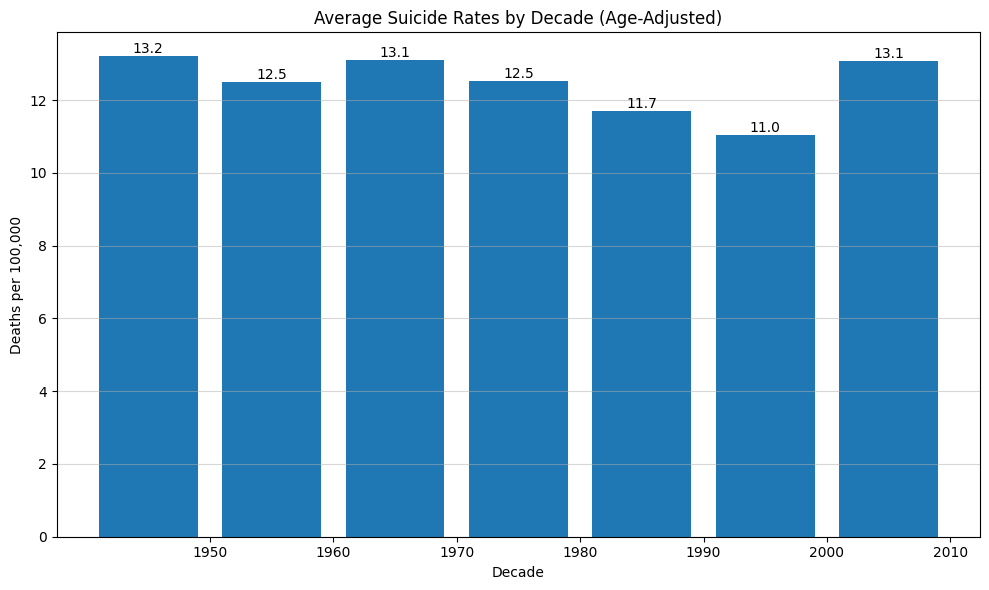

In [4]:
# Graph to visualize the data of average death rates of suicide by decade

total_rates['DECADE'] = (total_rates['YEAR'] // 10) * 10
decade_avg = total_rates.groupby('DECADE')['ESTIMATE'].mean().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(decade_avg['DECADE'], decade_avg['ESTIMATE'], width=8)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}', ha='center', va='bottom')

plt.title('Average Suicide Rates by Decade (Age-Adjusted)')
plt.xlabel('Decade')
plt.ylabel('Deaths per 100,000')
plt.xticks(decade_avg['DECADE'] + 5, decade_avg['DECADE'])  # Center labels
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

# Implementations of 6 Questions to Answer

In [19]:
# QUESTION 1
# How do suicide rates differ between males and females in the year 2018?

# Filter for most recent year (2018) and age-adjusted rates
recent = df[(df['YEAR'] == 2018) & (df['UNIT'] == 'Deaths per 100,000 resident population, age-adjusted')]

# Get overall male and female rates (All Persons)
male_rate = recent[recent['STUB_LABEL'] == 'Male']['ESTIMATE'].values[0]
female_rate = recent[recent['STUB_LABEL'] == 'Female']['ESTIMATE'].values[0]

# Calculate ratio
ratio = male_rate / female_rate

print('-The male suicide rate is:',male_rate,'per 100,000\n-The female suicide rate is:',female_rate,'per 100,000\n-The ratio is for 1 woman, there is:',ratio.round(2), 'men per 100,000')

-The male suicide rate is: 22.8 per 100,000
-The female suicide rate is: 6.2 per 100,000
-The ratio is for 1 woman, there is: 3.68 men per 100,000


# Question 1 Insights
- The male suicide rate is nearly 4 times higher than females
- While female rates have increased slightly since 2000 (from ~4 to 6.2), male rates have increased more sharply
- The disparity has persisted for all 68 years in the dataset
- RELEVANCY: This consistent pattern suggests biological, behavioral, and sociocultural factors all contribute to the sex disparity in suicide mortality.

In [20]:
# QUESTION 2
# Which age group has the highest suicide rate?

recent = df[(df['YEAR'] == 2018) & (df['UNIT'] == 'Deaths per 100,000 resident population, crude')]

# Extract age groups from the data
age_data = recent[recent['STUB_NAME'] == 'Age'].copy()
age_data['Age Group'] = age_data['STUB_LABEL']

# Find overall highest risk age group
overall_max_age = age_data.loc[age_data['ESTIMATE'].idxmax(), 'Age Group']
overall_max_rate = age_data['ESTIMATE'].max()

print(f"Overall highest suicide rate is in age group: {overall_max_age} ({overall_max_rate:.1f} per 100,000)")

Overall highest suicide rate is in age group: 55-64 years (20.2 per 100,000)


# Question 2 Insights
- The death rates are significantly higher than the other age groups
- This is expressed in white males more than any other demographic
- RELEVANCY: This is most common within the white demographic and aligns with the previous question of which sex has increased death rates

In [ ]:
# QUESTION 3
#

# Question 3 Insights
-
-
-

In [ ]:
# Question 4
# 

# Question 4 Insights
-
-
-

In [ ]:
# QUESTION 5
# 

# Question 5 Insights
-
-
-

In [ ]:
# Question 6
# 

# Question 6 Insights
-
-
-